Importamos las librerias necesarias

In [1]:
import pandas as pd
from sklearn.utils import shuffle
%matplotlib inline

Cargamos los datasets de train y test

In [2]:
df_train = pd.read_csv('ChallengeFiles\\TrainMyriad.csv')
df_test = pd.read_csv('ChallengeFiles\\TestMyriad.csv')

Obtenemos el shuffled train dataset y le separamos en X_train (features dataset) e y_train (classes dataset)

In [3]:
df_train = shuffle(df_train)#, random_state=0)
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

In [4]:
# window = 5
# X_train = X_train.rolling(window, center=True, axis=1).mean().iloc[:,(window - 1) // 2 : -(window - 1) // 2]
# df_test = df_test.rolling(window, center=True, axis=1).mean().iloc[:,(window - 1) // 2 : -(window - 1) // 2]

Generamos algunas visualizaciones del training dataset

In [5]:
from utils.visualization import visualization
viz = visualization(X_train, y_train)

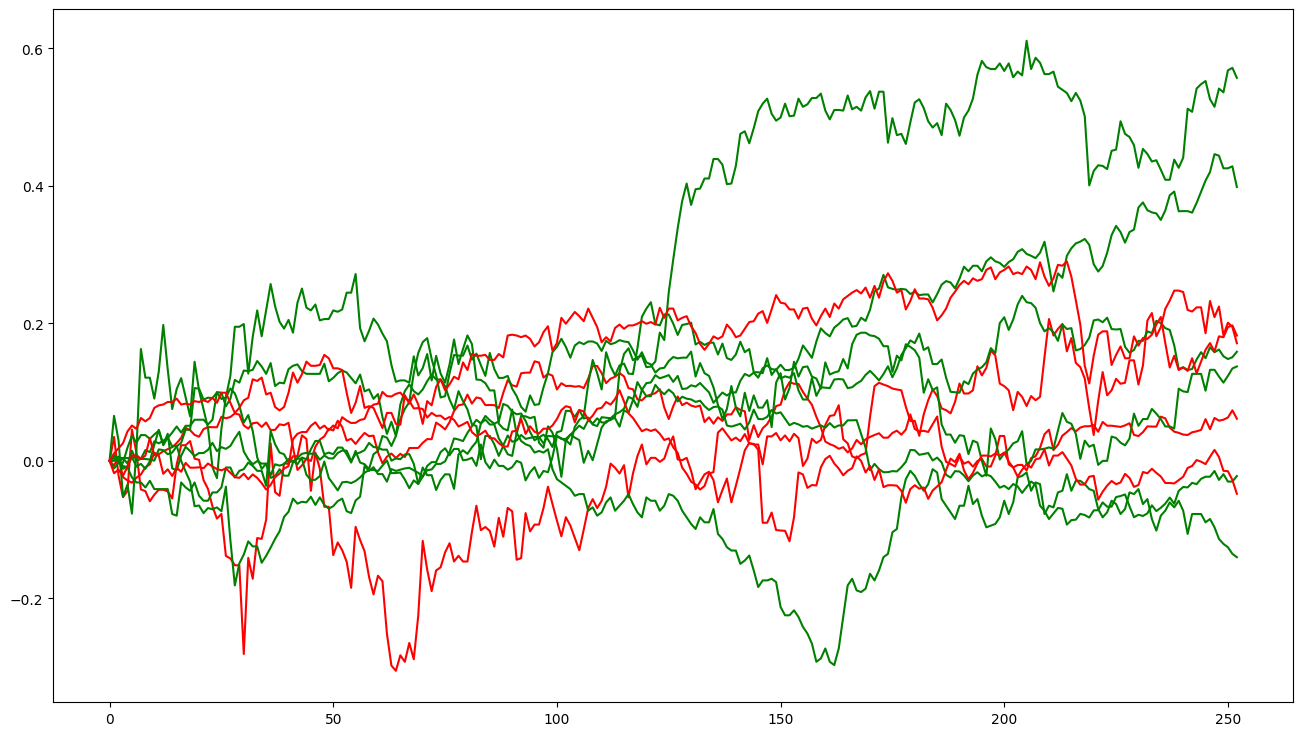

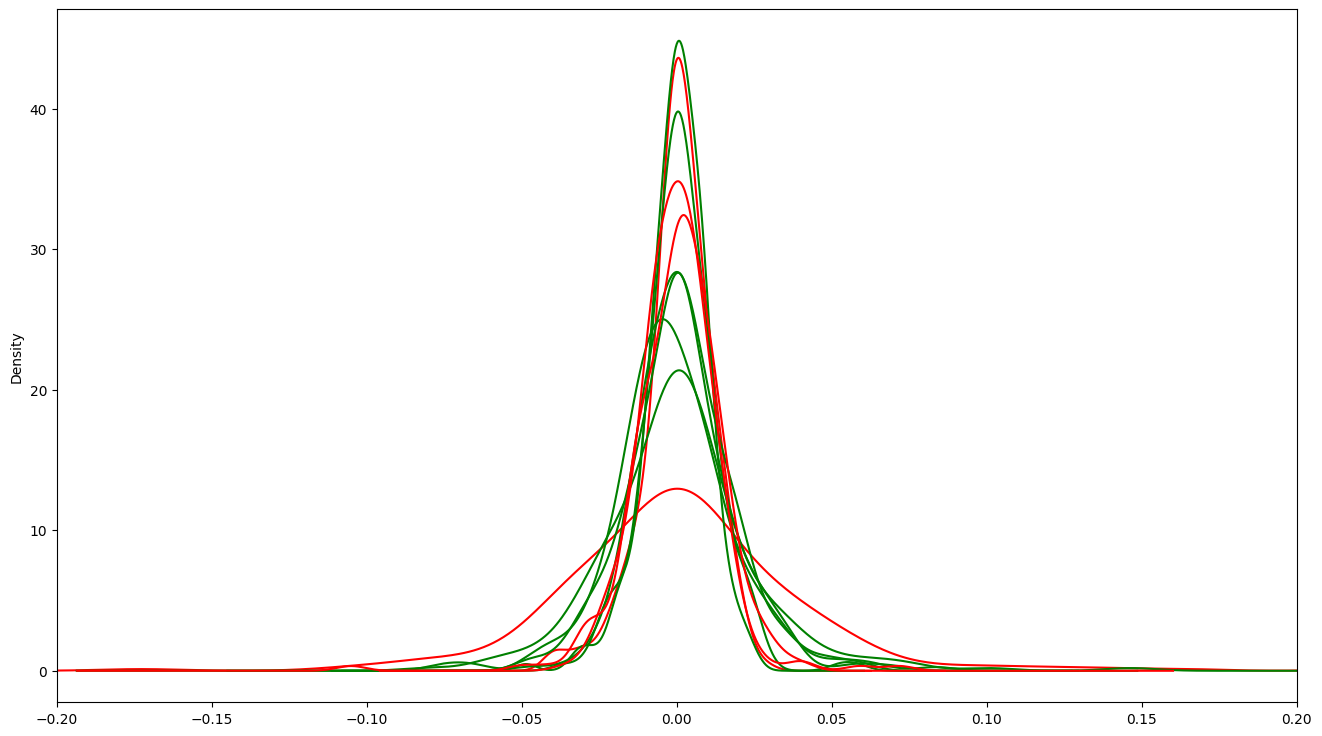

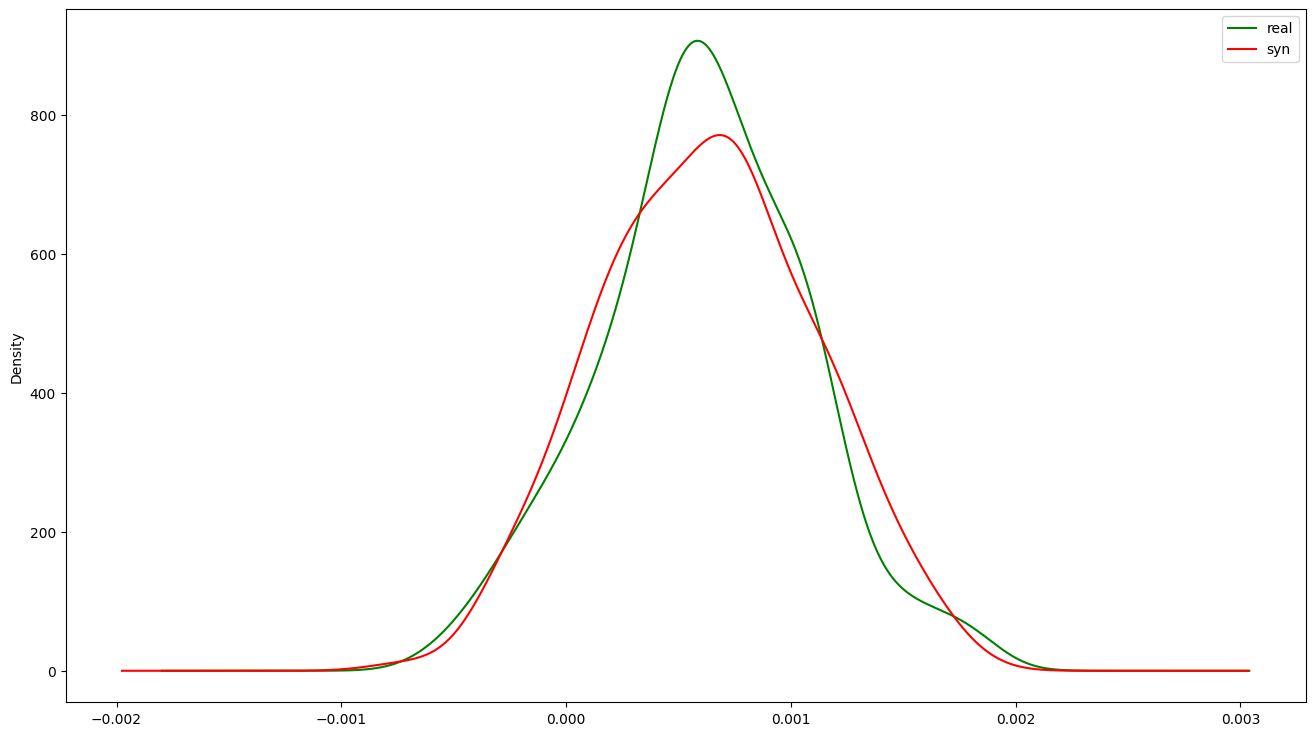

In [6]:
viz.plot_series()
viz.plot_density()
viz.plot_mean_density()

Importamos la clase modeling para estudiar el AUC en el entrenamiento de los modelos

In [7]:
from utils.modeling import modeling

Importamos los modelos

In [8]:
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import Matern, DotProduct
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Estudiamos los mismos

Mean AUC training sub-training set cross-validation score: 0.52
[0.52222903 0.52382741 0.5068265  0.51350601 0.54092631]
AUC training sub-testing set score: 0.49


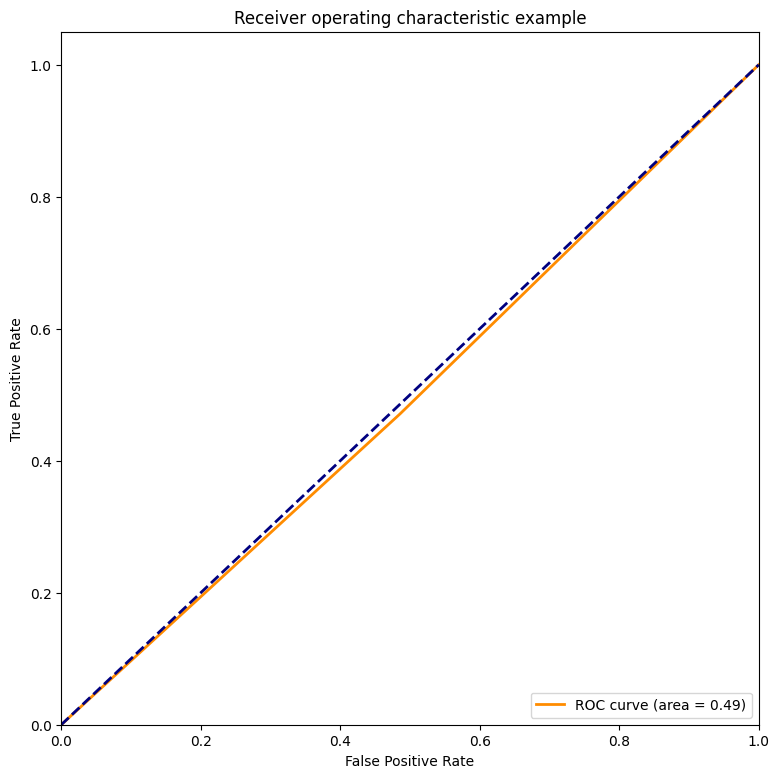

In [9]:
model_xg = modeling(xgb.XGBClassifier(max_depth=10, eval_metric='error'), X_train, y_train, df_test)
model_xg.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.51
[0.50402123 0.52493794 0.51027241 0.51074602 0.5007839 ]
AUC training sub-testing set score: 0.50


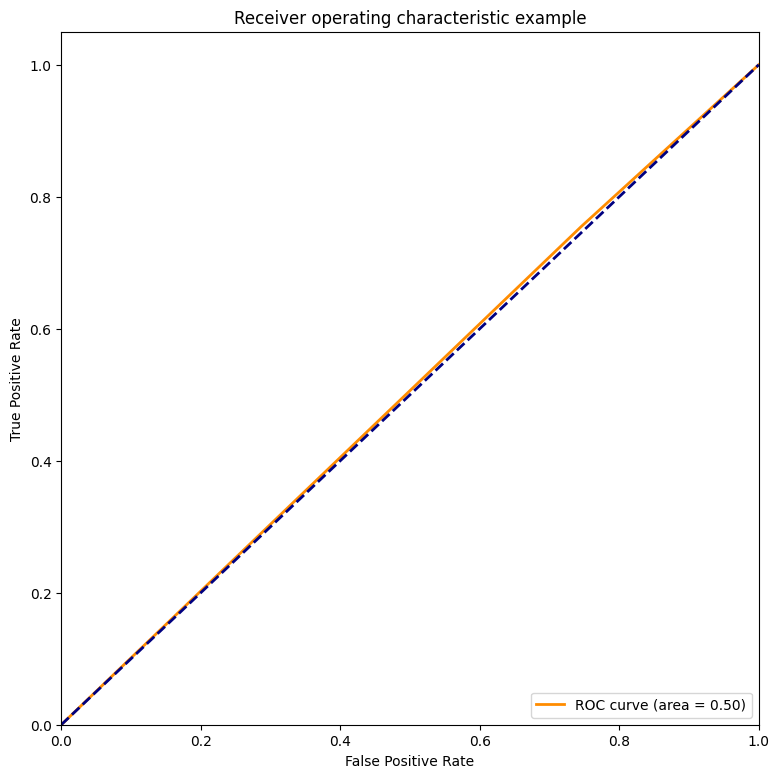

In [10]:
model_knn = modeling(KNeighborsClassifier(3), X_train, y_train, df_test)
model_knn.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.53
[0.49728516 0.55720865 0.5383133  0.54267377 0.53245035]
AUC training sub-testing set score: 0.50


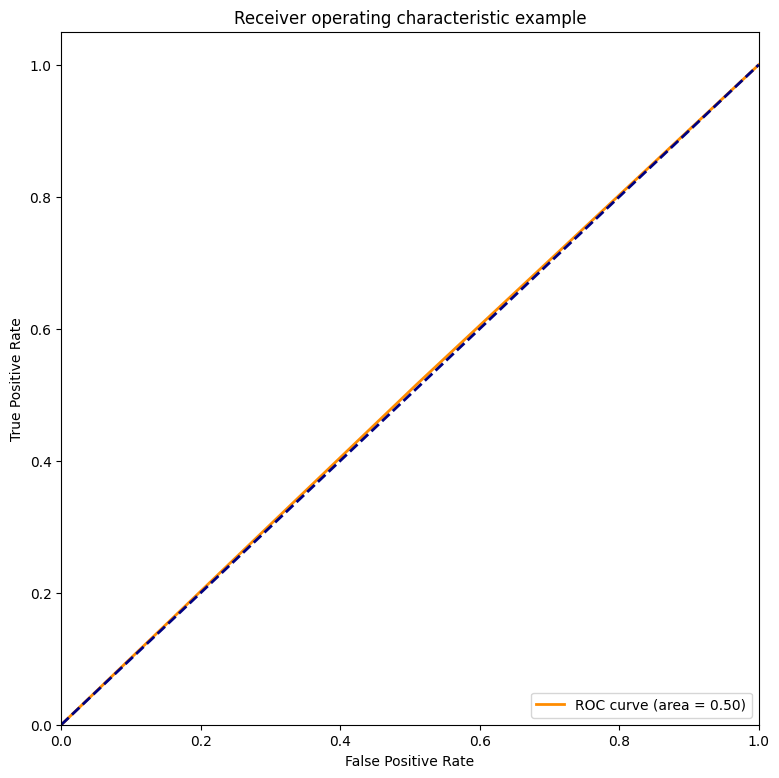

In [11]:
model_svc = modeling(SVC(), X_train, y_train, df_test)
model_svc.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.51
[0.47877118 0.5        0.52281487 0.50545466 0.51949961]
AUC training sub-testing set score: 0.50


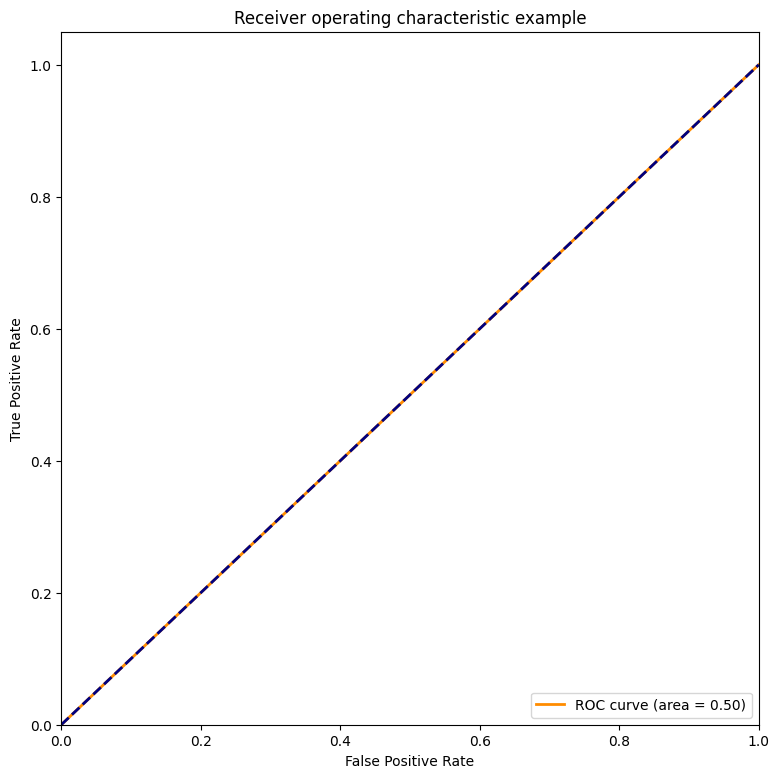

In [12]:
model_gp = modeling(GaussianProcessClassifier(DotProduct()*Matern()), X_train, y_train, df_test)
model_gp.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.51
[0.49769341 0.52451333 0.48982558 0.52655474 0.53318526]
AUC training sub-testing set score: 0.49


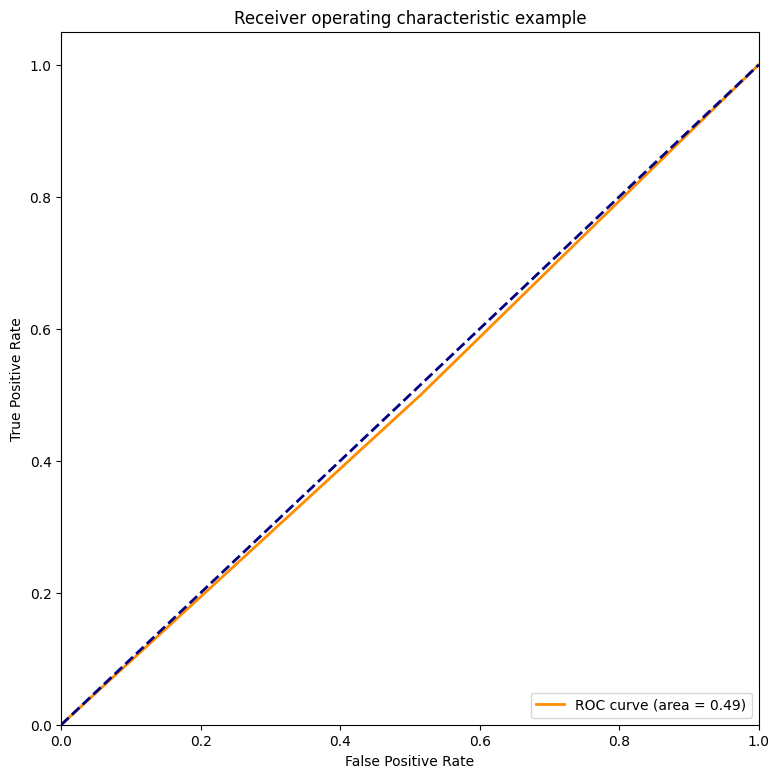

In [13]:
model_dt = modeling(DecisionTreeClassifier(max_depth=10), X_train, y_train, df_test)
model_dt.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.53
[0.48399673 0.55691469 0.54412725 0.52644042 0.53627188]
AUC training sub-testing set score: 0.52


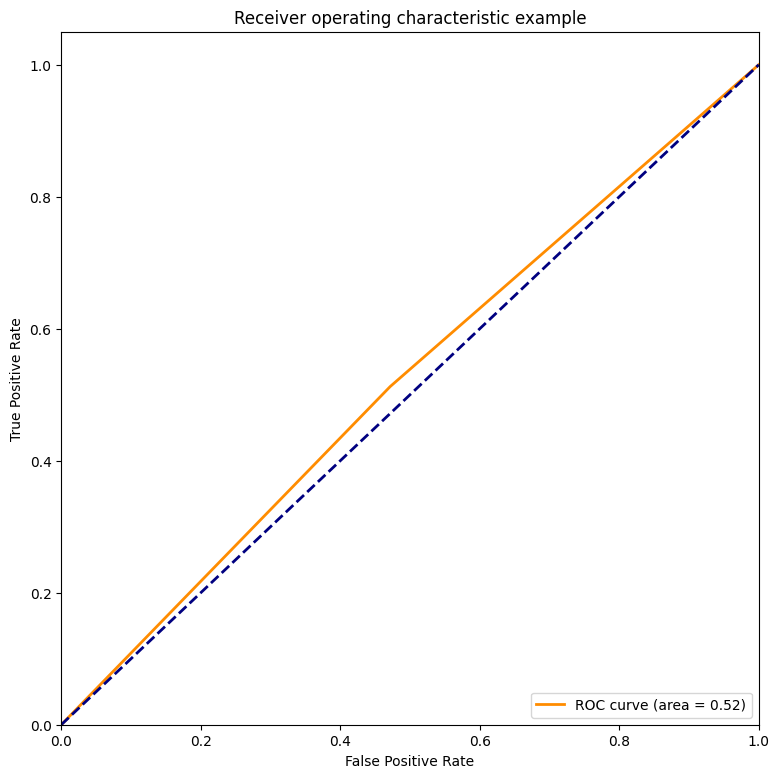

In [14]:
model_rf = modeling(RandomForestClassifier(max_depth=10), X_train, y_train, df_test)
model_rf.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.51
[0.49048785 0.53517768 0.51192187 0.53133982 0.49975503]
AUC training sub-testing set score: 0.50


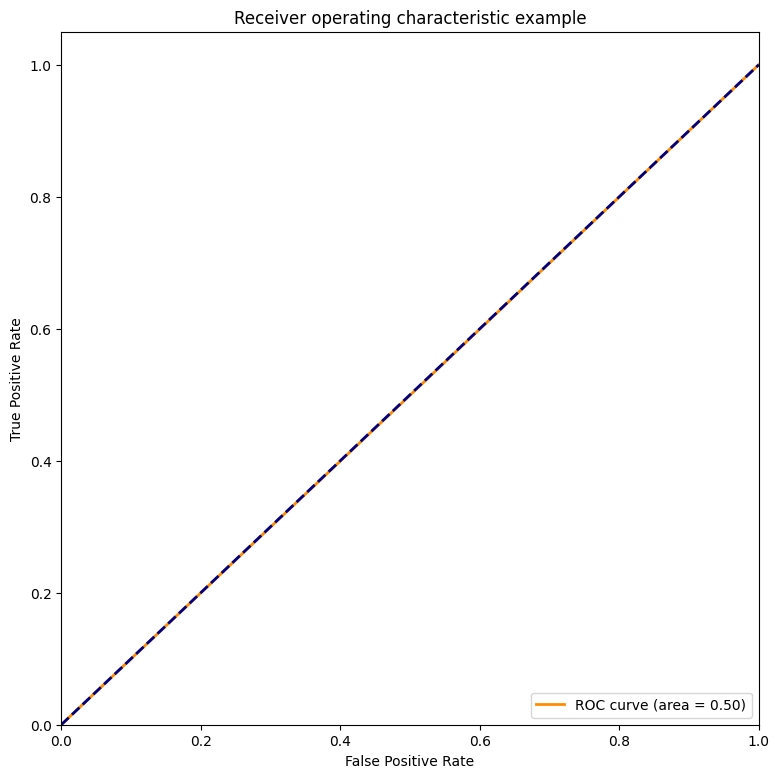

In [15]:
model_mlpc = modeling(MLPClassifier(), X_train, y_train, df_test)
model_mlpc.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.51
[0.48673199 0.53308727 0.51559642 0.49709302 0.50352757]
AUC training sub-testing set score: 0.52


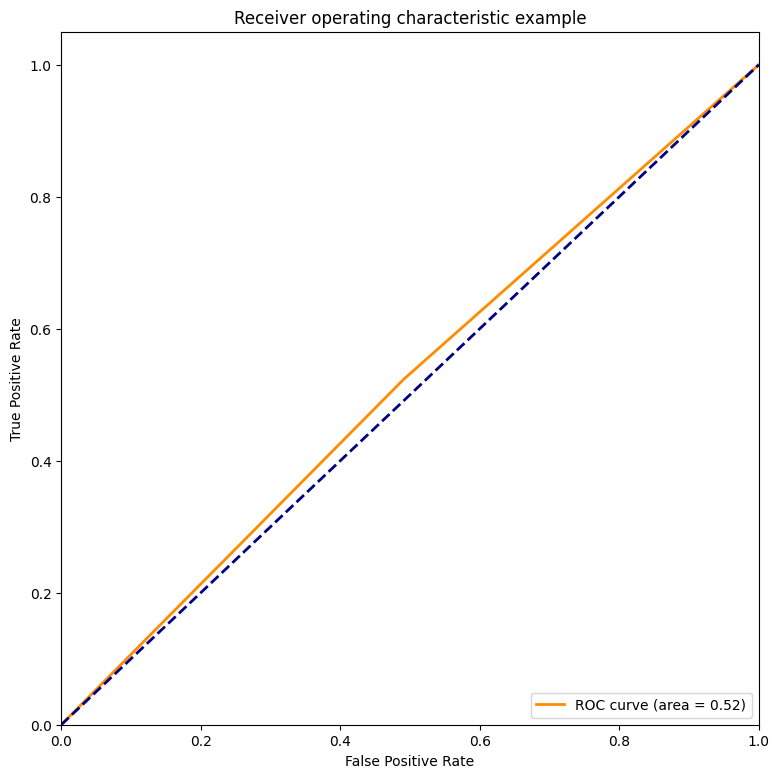

In [16]:
model_ada = modeling(AdaBoostClassifier(), X_train, y_train, df_test)
model_ada.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.53
[0.52171872 0.54097531 0.51544944 0.52479096 0.52441534]
AUC training sub-testing set score: 0.51


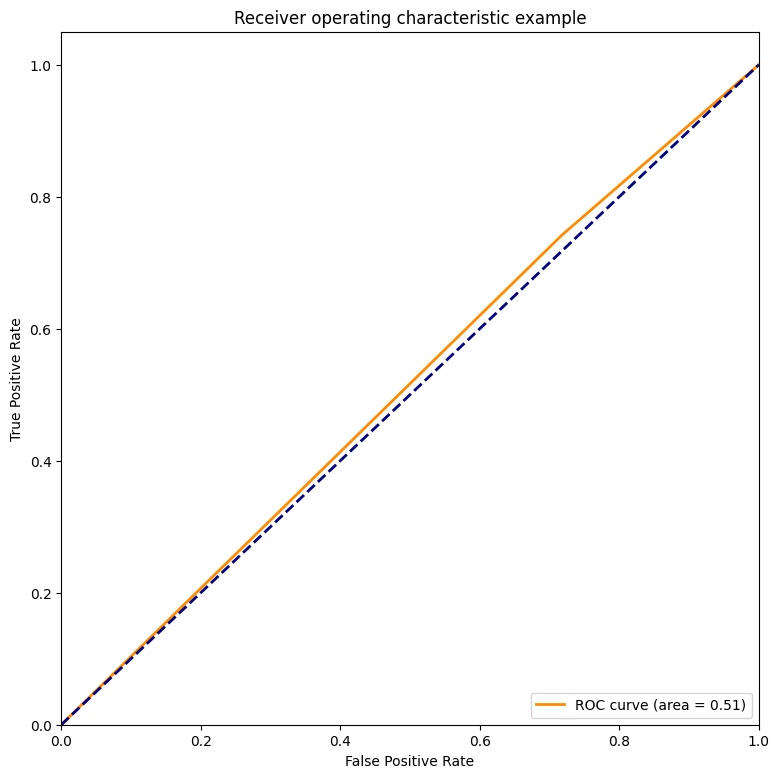

In [17]:
model_gnb = modeling(GaussianNB(), X_train, y_train, df_test)
model_gnb.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.53
[0.52337212 0.53725176 0.53483473 0.5314868  0.52049582]
AUC training sub-testing set score: 0.52


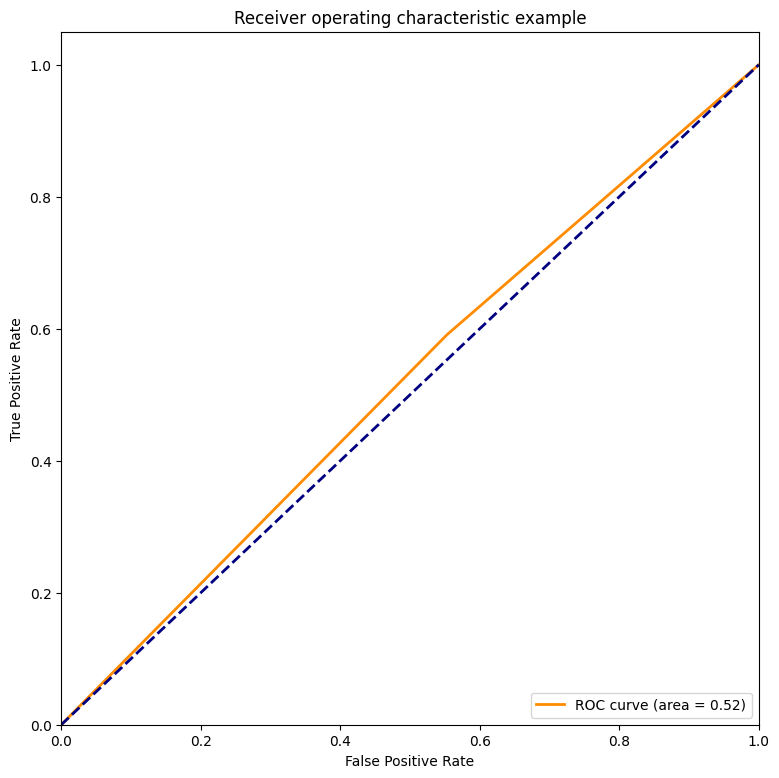

In [18]:
model_qda = modeling(QuadraticDiscriminantAnalysis(), X_train, y_train, df_test)
model_qda.cv(cv_train=True)